In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from datasets import load_dataset

ds = load_dataset("Jsevisal/go_emotions_wheel")

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})

In [4]:
df = ds['train'].to_pandas()

In [5]:
df

,text,labels,id
0,My favourite food is anything I didn't have to...,[5],eebbqej
1,"Now if he does off himself, everyone will thin...",[5],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[7],eezlygj
3,To make her feel threatened,[2],ed7ypvh
4,Dirty Southern Wankers,[7],ed0bdzj
...,...,...,...
43405,Added you mate well I’ve just got the bow and ...,[0],edsb738
43406,Always thought that was funny but is it a refe...,[3],ee7fdou
43407,What are you talking about? Anything bad that ...,[7],efgbhks
43408,"More like a baptism, with sexy results!",[0],ed1naf8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43410 entries, 0 to 43409
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    43410 non-null  object
 1   labels  43410 non-null  object
 2   id      43410 non-null  object
dtypes: object(3)
memory usage: 1017.5+ KB


In [22]:
df.describe()

,text,labels,id
count,43410,43410,43410
unique,43227,7111,43410
top,Thank you.,[5],eecwmbq
freq,13,12823,1


In [7]:
import spacy

In [8]:
nlp = spacy.load("en_core_web_sm")

In [9]:
docs = list(nlp.pipe(df['text']))

In [10]:
token_lists = [[token.text for token in doc] for doc in docs]

In [11]:
token_counts = [len([t for t in doc if not t.is_punct and not t.is_space]) for doc in docs]

In [12]:
min_idx = token_counts.index(min(token_counts))
print(f"Renglón con MENOS tokens: {df['text'].iloc[min_idx]}")
print(f"Tamaño: {len(df['text'].iloc[min_idx])} caracteres.")

Renglón con MENOS tokens: :((
Tamaño: 3 caracteres.


In [13]:
max_idx = token_counts.index(max(token_counts))
print(f"Renglón con MÁS tokens: {df['text'].iloc[max_idx]}")
print(f"Tamaño: {len(df['text'].iloc[max_idx])} caracteres.")

Renglón con MÁS tokens: For your kindness to mobile users I give a platinum ⠀⠀⠀⠀⠀⣤⣶⣶⡶⠦⠴⠶⠶⠶⠶⡶⠶⠦⠶⠶⠶⠶⠶⠶⠶⣄⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⣿⣀⣀⣀⣀⠀⢀⣤⠄⠀⠀⣶⢤⣄⠀⠀⠀⣤⣤⣄⣿⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠿⣿⣿⣿⣿⡷⠋⠁⠀⠀⠀⠙⠢⠙⠻⣿⡿⠿⠿⠫⠋⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⢀⣤⠞⠉⠀⠀⠀⠀⣴⣶⣄⠀⠀⠀⢀⣕⠦⣀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⢀⣤⠾⠋⠁⠀⠀⠀⠀⢀⣼⣿⠟⢿⣆⠀⢠⡟⠉⠉⠊⠳⢤⣀⠀⠀⠀ ⠀⣠⡾⠛⠁⠀⠀⠀⠀⠀⢀⣀⣾⣿⠃⠀⡀⠹⣧⣘⠀⠀⠀⠀⠀⠀⠉⠳⢤⡀ ⠀⣿⡀⠀⠀⢠⣶⣶⣿⣿⣿⣿⡿⠁⠀⣼⠃⠀⢹⣿⣿⣿⣶⣶⣤⠀⠀⠀⢰⣷ ⠀⢿⣇⠀⠀⠈⠻⡟⠛⠋⠉⠉⠀⠀⡼⠃⠀⢠⣿⠋⠉⠉⠛⠛⠋⠀⢀⢀⣿⡏ ⠀⠘⣿⡄⠀⠀⠀⠈⠢⡀⠀⠀⠀⡼⠁⠀⢠⣿⠇⠀⠀⡀⠀⠀⠀⠀⡜⣼⡿⠀ ⠀⠀⢻⣷⠀⠀⠀⠀⠀⢸⡄⠀⢰⠃⠀⠀⣾⡟⠀⠀⠸⡇⠀⠀⠀⢰⢧⣿⠃⠀ ⠀⠀⠘⣿⣇⠀⠀⠀⠀⣿⠇⠀⠇⠀⠀⣼⠟⠀⠀⠀⠀⣇⠀⠀⢀⡟⣾⡟⠀⠀ ⠀⠀⠀⢹⣿⡄⠀⠀⠀⣿⠀⣀⣠⠴⠚⠛⠶⣤⣀⠀⠀⢻⠀⢀⡾⣹⣿⠃⠀⠀ ⠀⠀⠀⠀⢿⣷⠀⠀⠀⠙⠊⠁⠀⢠⡆⠀⠀⠀⠉⠛⠓⠋⠀⠸⢣⣿⠏⠀⠀⠀ ⠀⠀⠀⠀⠘⣿⣷⣦⣤⣤⣄⣀⣀⣿⣤⣤⣤⣤⣤⣄⣀⣀⣀⣀⣾⡟⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⢹⣿⣿⣿⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠁⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠃
Tamaño: 542 caracteres.


In [14]:
from collections import Counter

unigrams = [
    token.text.lower() for doc in docs for token in doc 
    if not token.is_stop and not token.is_punct and not token.is_space
]

unigram_counts = Counter(unigrams)

In [15]:
noun_chunks = [chunk.text.lower() for doc in docs for chunk in doc.noun_chunks]
noun_chunk_counts = Counter(noun_chunks)

In [37]:
import os
os.makedirs('EDA/img', exist_ok=True)

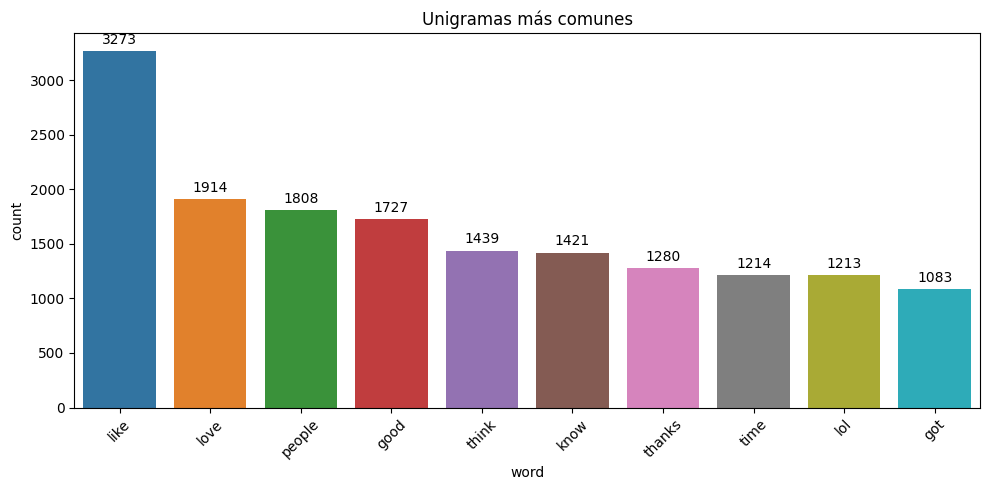

In [43]:
df_unigram_counts = pd.DataFrame(data=unigram_counts.most_common(10), columns = ['word', 'count'])
plt.figure(figsize=(10, 5))
ax = sns.barplot(data = df_unigram_counts,
                x = 'word',
                y = 'count',
                hue = 'word')
for container in ax.containers:
    ax.bar_label(container,
                fmt = '%.0f',
                label_type = 'edge',
                padding = 3)
plt.title('Unigramas más comunes')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('img/unigramas_mas_comunes', dpi = 400)
plt.show()

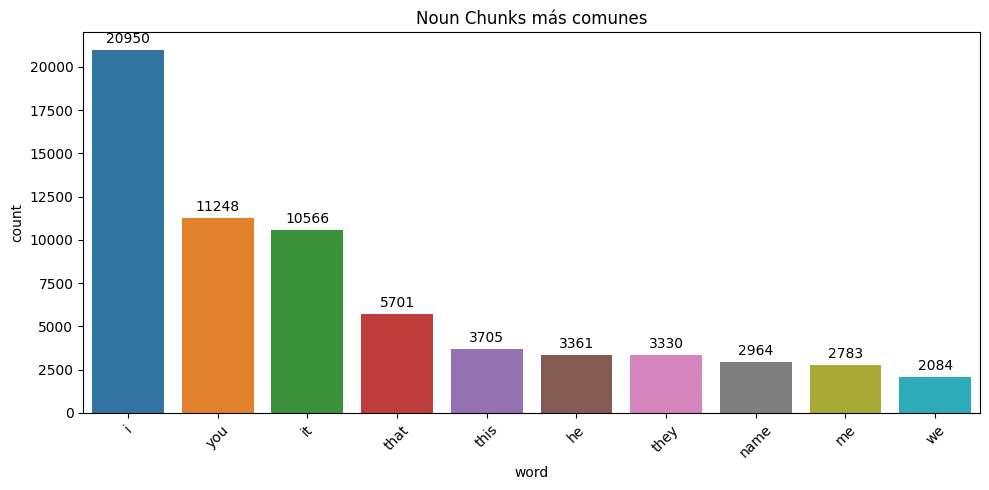

In [56]:
df_noun_chunks = pd.DataFrame(data=noun_chunk_counts.most_common(10), columns = ['word', 'count'])
plt.figure(figsize=(10,5))
ax = sns.barplot(data = df_noun_chunks,
                x = 'word',
                y = 'count',
                hue = 'word')
for container in ax.containers:
    ax.bar_label(container, fmt = '%.0f', label_type = 'edge', padding = 3)
plt.title('Noun Chunks más comunes')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('img/noun_chunks_mas_comunes.png')
plt.show()

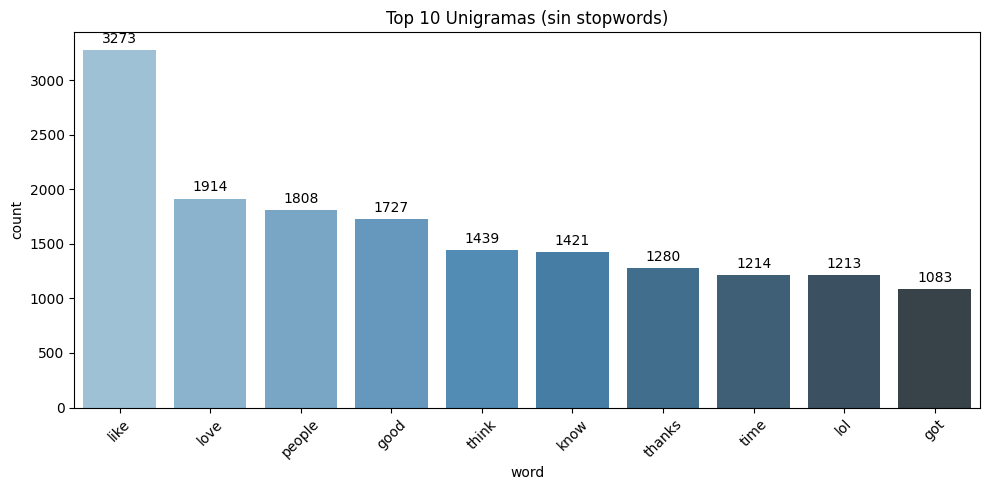

In [42]:
top_uni = unigram_counts.most_common(10)
df_plot = pd.DataFrame(top_uni, columns=["word", "count"])

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_plot, x="word", y="count", palette="Blues_d", hue="word")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.title("Top 10 Unigramas (sin stopwords)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('img/top_unigramas.png', dpi = 400)
plt.show()

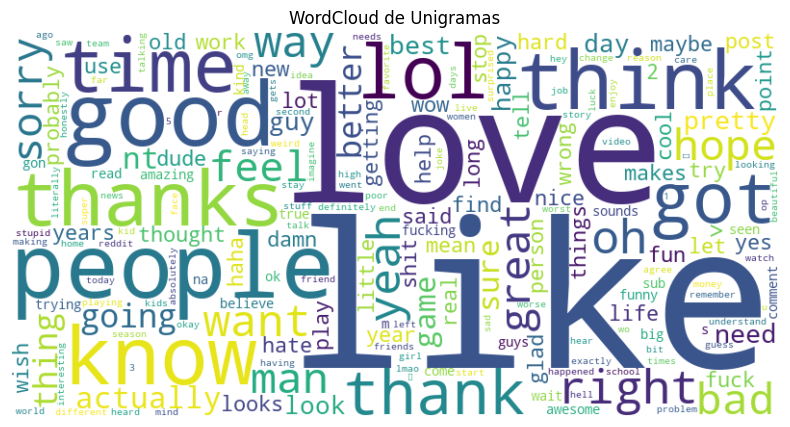

In [36]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(unigram_counts)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud de Unigramas")
plt.savefig("EDA/img/wordcloud.png")
plt.show()

In [16]:
!conda env export --no-builds > env.yml